In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import os
import numpy as np
from scipy.optimize import curve_fit

import decomposition
import potential_data
import scaler
import plots

    smearing_step   T  r/a     aV(r)       err projection      beta
0           420.0   1   18  0.173054  0.000328        new  beta=6.0
1           420.0   2   18  0.182883  0.000368        new  beta=6.0
2           420.0   3   18  0.186975  0.000402        new  beta=6.0
3           420.0   4   18  0.188997  0.000434        new  beta=6.0
4           420.0   5   18  0.190372  0.000473        new  beta=6.0
5           420.0   6   18  0.191536  0.000513        new  beta=6.0
6           420.0   7   18  0.192403  0.000559        new  beta=6.0
7           420.0   8   18  0.193748  0.000617        new  beta=6.0
8           420.0   9   18  0.195184  0.000681        new  beta=6.0
9           420.0  10   18  0.196321  0.000751        new  beta=6.0
10          420.0  11   18  0.197328  0.000837        new  beta=6.0
11          420.0  12   18  0.198146  0.000938        new  beta=6.0
12          420.0  13   18  0.199306  0.001069        new  beta=6.0
13          420.0  14   18  0.200267  0.001211  

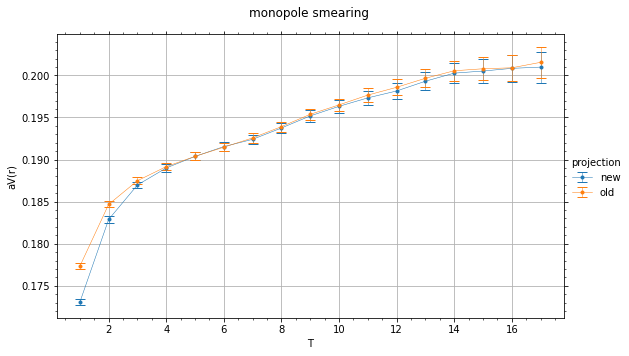

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0//potential_projection_


In [8]:
show_plot = True
coordinate = 'T'
hue = 'projection'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'projection': 'new', 'beta': 'beta=6.0'}, 'constraints': {'r/a': (18, 18), 'smearing_step': (420, 420)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'projection': 'old', 'beta': 'beta=6.0'}, 'constraints': {'r/a': (18, 18)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_projection_'
data = potential_data.get_potantial_data(paths)
print(data)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

    smearing_step   T  r/a     aV(r)       err projection      beta
0           420.0  17    1  0.003979  0.000006        new  beta=6.0
1           420.0  17    2  0.010635  0.000018        new  beta=6.0
2           420.0  17    3  0.018610  0.000034        new  beta=6.0
3           420.0  17    4  0.027556  0.000054        new  beta=6.0
4           420.0  17    5  0.037284  0.000078        new  beta=6.0
5           420.0  17    6  0.047667  0.000108        new  beta=6.0
6           420.0  17    7  0.058614  0.000143        new  beta=6.0
7           420.0  17    8  0.070053  0.000187        new  beta=6.0
8           420.0  17    9  0.081926  0.000238        new  beta=6.0
9           420.0  17   10  0.094187  0.000301        new  beta=6.0
10          420.0  17   11  0.106789  0.000378        new  beta=6.0
11          420.0  17   12  0.119696  0.000472        new  beta=6.0
12          420.0  17   13  0.132872  0.000589        new  beta=6.0
13          420.0  17   14  0.146267  0.000735  

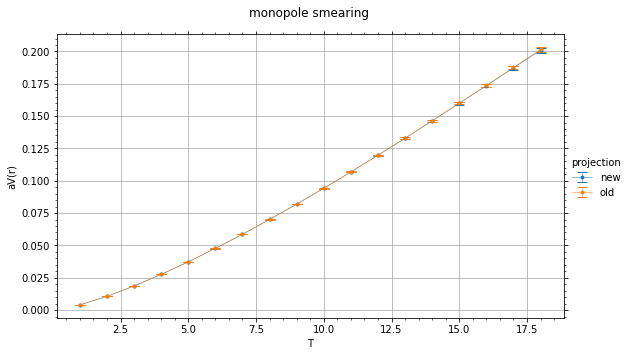

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0//potential_projection_


In [2]:
show_plot = True
coordinate = 'r/a'
hue = 'projection'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'projection': 'new', 'beta': 'beta=6.0'}, 'constraints': {'T': (17, 17), 'smearing_step': (420, 420)}},
          {'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'projection': 'old', 'beta': 'beta=6.0'}, 'constraints': {'T': (17, 17)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_projection_'
data = potential_data.get_potantial_data(paths)
print(data)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

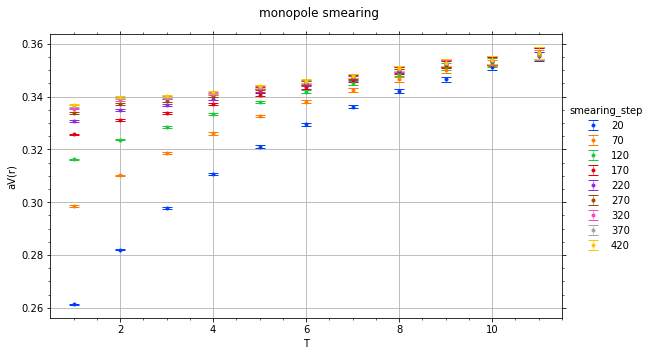

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0//potential_smearing_


In [2]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'monopole'}, 'constraints': {'r/a': (12, 12), 'T': (1, 12), 'smearing_step': (20, 420)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

In [3]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.25/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0', 'potential_type': 'monopole'}, 'constraints': {'r/a': (12, 12), 'T': (1, 12), 'smearing_step': (20, 820)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

FileNotFoundError: [Errno 2] No such file or directory: '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.25/steps_500/copies=4/potential_monopole.csv'

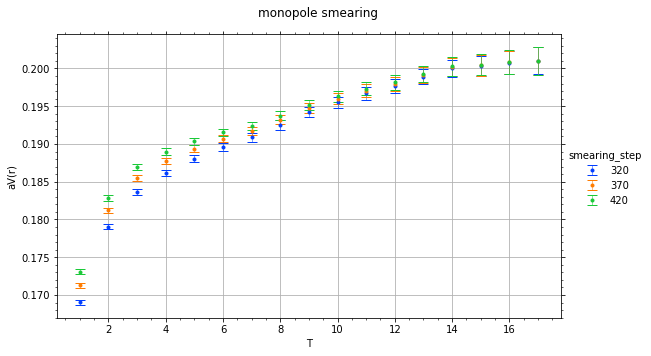

../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [10]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.3', 'potential_type': 'monopole'}, 'constraints': {'r/a': (18, 18), 'T': (1, 18), 'smearing_step': (300, 420)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

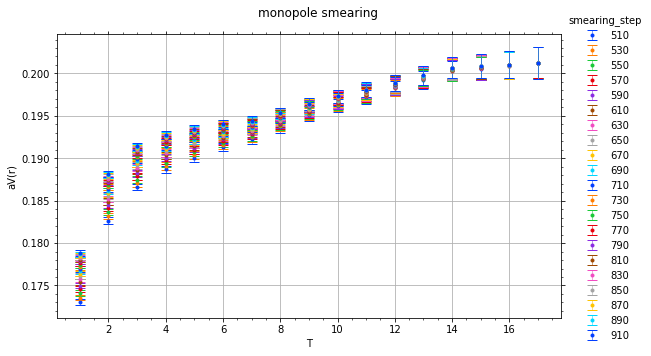

../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [9]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.25/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.3', 'potential_type': 'monopole'}, 'constraints': {'r/a': (18, 18), 'T': (1, 18), 'smearing_step': (500, 920)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_df(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, 'T', 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

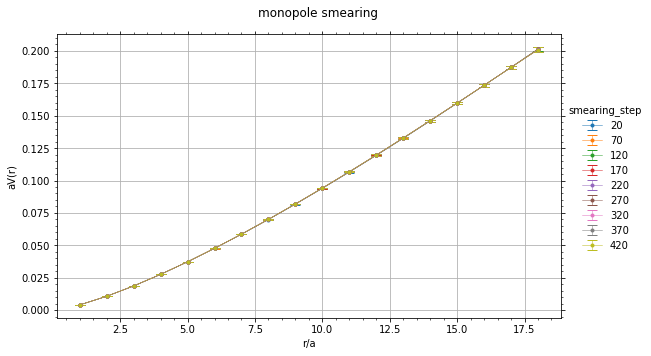

../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [8]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/36^4/beta6.3/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.3'}, 'constraints': {'r/a': (1, 18), 'T': (17, 17), 'smearing_step': (20, 420)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, coordinate, 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

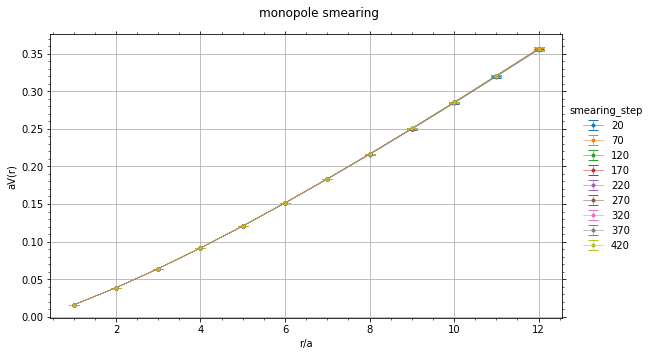

../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0//potential_smearing_


In [7]:
show_plot = True
coordinate = 'r/a'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/24^4/beta6.0/HYP0_APE_alpha=0.5/steps_500/copies=4/potential_monopole.csv',
          'parameters': {'beta': 'beta=6.0'}, 'constraints': {'r/a': (1, 12), 'T': (11, 11), 'smearing_step': (20, 420)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/24^4/beta6.0/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, 'aV(r)', hue, groupby, coordinate, 'aV(r)', 'monopole smearing', image_path, image_name, show_plot, err='err')

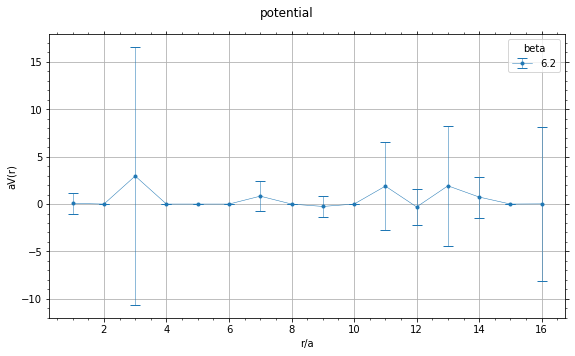

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [3]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/32^3x64/beta6.2/HYP0_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 6.2}, 'constraints': {'T': (4, 4)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

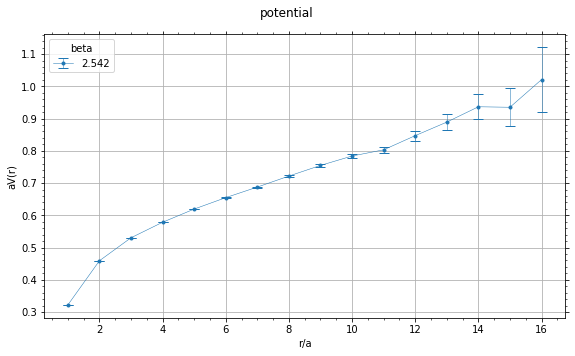

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [3]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential_original.csv',
          'parameters': {'beta': 2.542}, 'constraints': {'T': (6, 6)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

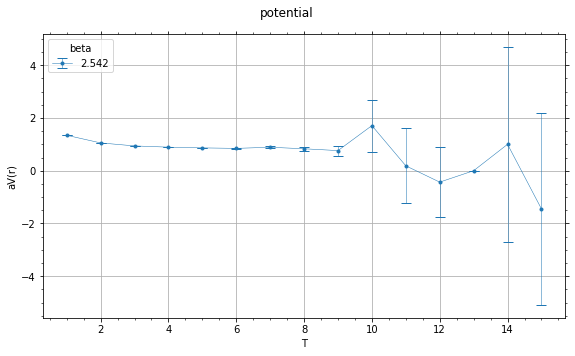

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [4]:
show_plot = True
coordinate = 'T'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential_original.csv',
          'parameters': {'beta': 2.542}, 'constraints': {'r/a': (12, 12)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

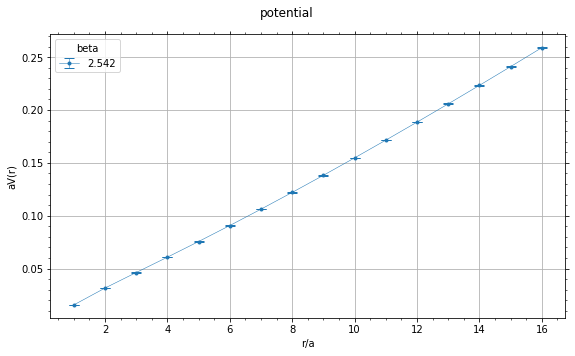

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [5]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/T_step=0.001/potential_monopole.csv',
          'parameters': {'beta': 2.542}, 'constraints': {'T': (6, 6)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

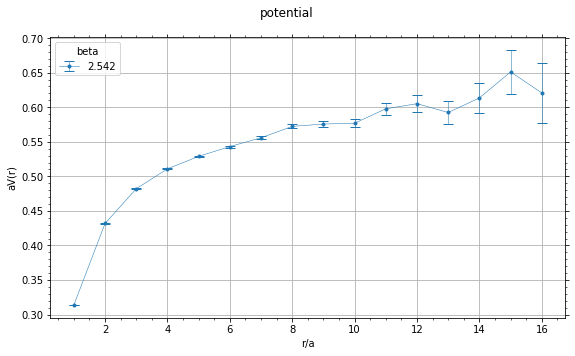

../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/potential


In [6]:
show_plot = True
coordinate = 'r/a'
hue = 'beta'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542/T_step=0.001/potential_monopoless.csv',
          'parameters': {'beta': 2.542}, 'constraints': {'T': (8, 8)}}]
image_path = f'../../images/potential/dwilson_loop_spatial/fundamental/on-axis/su2/gluodynamics/32^3x8/beta2.542'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

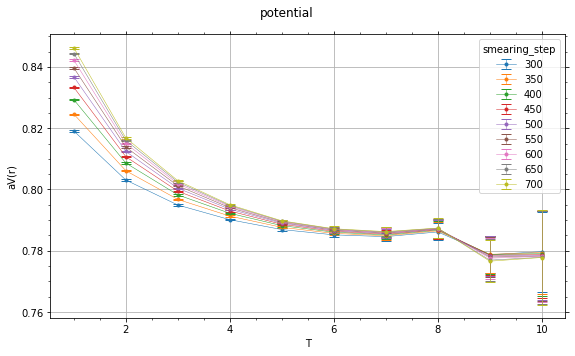

../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [2]:
show_plot = True
coordinate = 'T'
hue = 'smearing_step'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/smearing/potential/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'beta': 'beta=6.3'}, 'constraints': {'r/a': (10, 10), 'T': (1, 10), 'smearing_step': (300, 700)}}]
image_path = f'../../images/potential/smearing/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

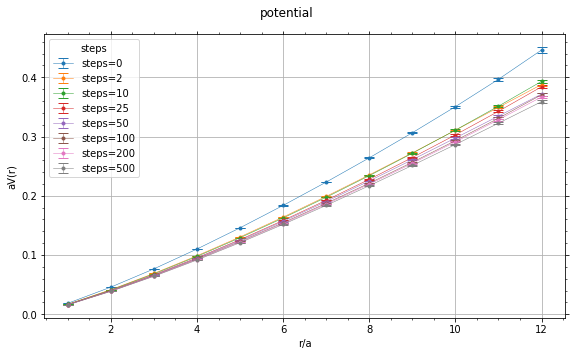

../../images/potential/test/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [21]:
show_plot = True
coordinate = 'r/a'
hue = 'steps'
groupby = []
t1 = 11
paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_0/copies=1/potential_abelian.csv',
          'parameters': {'steps': 'steps=0'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_2/copies=1/potential_abelian.csv',
          'parameters': {'steps': 'steps=2'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_10/copies=1/potential_abelian.csv',
          'parameters': {'steps': 'steps=10'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_25/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=25'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=50'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=100'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_200/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=200'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=500'}, 'constraints': {'T': (t1, t1)}}]
image_path = f'../../images/potential/test/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

In [22]:
show_plot = True
coordinate = 'r/a'
hue = 'steps'
groupby = []
t1 = 11
paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_25/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=25'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=2/potential_abelian.csv',
          'parameters': {'steps': 'steps=50_2'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=50_4'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=1/potential_abelian.csv',
          'parameters': {'steps': 'steps=100_1'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=2/potential_abelian.csv',
          'parameters': {'steps': 'steps=100_2'}, 'constraints': {'T': (t1, t1)}},
          {'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=4/potential_abelian.csv',
          'parameters': {'steps': 'steps=100_4'}, 'constraints': {'T': (t1, t1)}}]
image_path = f'../../images/potential/test/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

FileNotFoundError: [Errno 2] No such file or directory: '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=2/potential_abelian.csv'

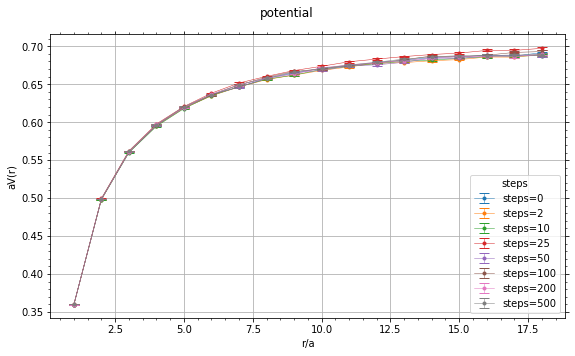

../../images/potential/test/su3/gluodynamics/36^4/beta6.3//potential_smearing_


In [7]:
show_plot = True
coordinate = 'r/a'
hue = 'steps'
groupby = []
t1 = 8
potential_name = 'monopoless'
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_0/copies=1/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=0'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_2/copies=1/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=2'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_10/copies=1/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=10'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_25/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=25'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_50/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=50'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_100/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=100'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_200/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=200'}, 'constraints': {'T': (t1, t1)}},
          {'path': f'../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=4/potential_{potential_name}.csv',
          'parameters': {'steps': 'steps=500'}, 'constraints': {'T': (t1, t1)}}]
image_path = f'../../images/potential/test/su3/gluodynamics/36^4/beta6.3/'
image_name = f'potential_smearing_'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

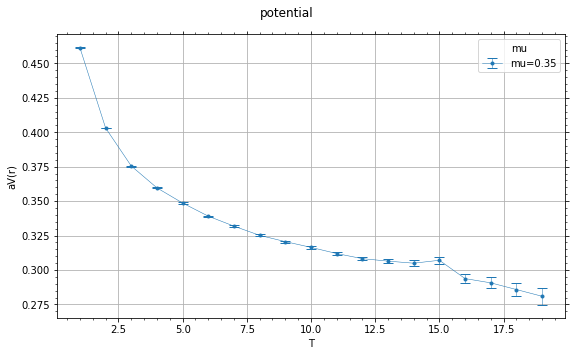

../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.35/comparison/potential


In [4]:
show_plot = True
coordinate = 'T'
hue = 'mu'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/su2/qc2dstag/40^4/mu0.35/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'mu': 'mu=0.35'}, 'constraints': {'r/a': (10, 10)}}]
image_path = f'../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.35/comparison'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

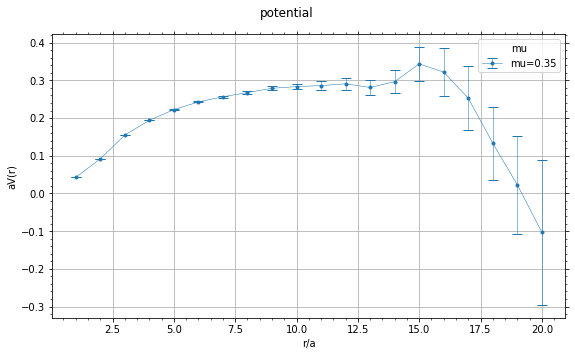

../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.35/comparison/potential


In [5]:
show_plot = True
coordinate = 'r/a'
hue = 'mu'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/su2/qc2dstag/40^4/mu0.35/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original1.csv',
          'parameters': {'mu': 'mu=0.35'}, 'constraints': {'T': (19, 19), 'r/a': (0, 20)}}]
image_path = f'../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.35/comparison'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)

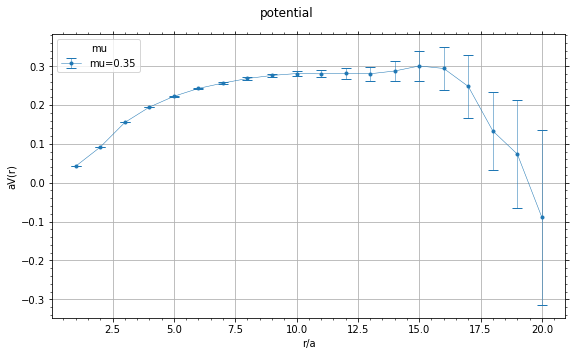

../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.35/comparison/potential


In [6]:
show_plot = True
coordinate = 'r/a'
hue = 'mu'
groupby = []
# paths = [{'path': '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/32^3x64/beta6.2/HYP1_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_original.csv',
paths = [{'path': '../../result/potential/wilson_loop/fundamental/su2/qc2dstag/40^4/mu0.35/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv',
          'parameters': {'mu': 'mu=0.35'}, 'constraints': {'T': (19, 19), 'r/a': (0, 20)}}]
image_path = f'../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.35/comparison'
image_name = f'potential'
data = potential_data.get_potantial_data(paths)
plots.make_plots_single(data, coordinate, hue, groupby, image_path, image_name, show_plot)